In [47]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#Make Data Frame Using Parameters form First

In [73]:
#get all the Files
path='/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/Jan1991-Nov1992/'
file_paths = []
file_names = sorted(os.listdir(path))
all_alts1 = []
for name in file_names:
        filepath = os.path.join(path,name)
        if os.path.isfile(filepath) and filepath[-4:] == '.txt':
            file_paths.append(filepath)
            filename_month = filepath[5:7]
            filename_year = filepath[0:4]
            data = np.loadtxt(fname=filepath, delimiter=',', skiprows=1, usecols=(0,1))
            col1 = data[:,0]
            altitude = col1/1000# Converts altitude to km
            all_alts1 = np.concatenate([all_alts1, altitude])
          
all_alts = list(set(all_alts1))
all_alts.sort()

print all_alts

[15.393000000000001, 15.692, 15.693, 15.992000000000001, 15.993, 16.292000000000002, 16.292999999999999, 16.591999999999999, 16.891999999999999, 17.190999999999999, 17.192, 17.491, 17.492000000000001, 17.791, 17.792000000000002, 18.091000000000001, 18.390999999999998, 18.690000000000001, 18.690999999999999, 18.989999999999998, 18.991, 19.289999999999999, 19.291, 19.59, 19.890000000000001, 20.189, 20.190000000000001, 20.489000000000001, 20.489999999999998, 20.789000000000001, 20.789999999999999, 21.088999999999999, 21.388000000000002, 21.388999999999999, 21.687999999999999, 21.689, 21.988, 21.989000000000001, 22.288, 22.289000000000001, 22.588000000000001, 22.887, 22.888000000000002, 23.187000000000001, 23.187999999999999, 23.486999999999998, 23.488, 23.786999999999999, 23.788, 24.087, 24.385999999999999, 24.387, 24.686, 24.687000000000001, 24.986000000000001, 24.986999999999998, 25.286000000000001, 25.286999999999999, 25.585999999999999, 25.885000000000002, 25.885999999999999, 26.18499

In [75]:
np.max(all_alts)
np.shape(all_alts)

(156,)

In [20]:
print file_paths [0]
print file_paths[-1]
# Check number of files in directory
import fnmatch

print len(fnmatch.filter(os.listdir('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/Jan1991-Nov1992/'), '*.txt'))

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/Jan1991-Nov1992/1991.01.01.txt
/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/Jan1991-Nov1992/1992.11.04.txt
113


In [78]:
df_MLO = pd.DataFrame()


for files in file_paths:
    print files
    #Read in First First File
    data = np.loadtxt(fname=files, delimiter=',', skiprows=1, usecols=(0,1))
    col1 = data[:,0]
    col2 = data[:,1]
    altitude = col1/1000# Converts altitude to km
    backscatter=col2*0.001
    Date=pd.to_datetime(files[-14:-4], format='%Y.%m.%d') # Converts filename date to Pandas datetime
    d_backscatter={Date : backscatter}
    #print Date
    print d_backscatter
             
      
    if df_MLO.empty:
        df_MLO = pd.DataFrame(d_backscatter, index=all_alts)
        
    else:
        df_temp_BS=pd.DataFrame(d_backscatter, index=all_alts)
        df_MLO = df_MLO.join(df_temp_BS)


#Transposes Axes so that the TIme is the Index, Makes reading it back in easier.        
df_MLO=df_MLO.transpose()

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/Jan1991-Nov1992/1991.01.01.txt
{Timestamp('1991-01-01 00:00:00'): array([ 1.028,  1.034,  1.021,  1.039,  1.034,  1.054,  1.076,  1.08 ,
        1.098,  1.12 ,  1.147,  1.174,  1.184,  1.142,  1.149,  1.127,
        1.143,  1.153,  1.165,  1.186,  1.152,  1.153,  1.176,  1.142,
        1.156,  1.163,  1.207,  1.225,  1.193,  1.235,  1.255,  1.25 ,
        1.21 ,  1.255,  1.242,  1.218,  1.221,  1.219,  1.268,  1.298,
        1.297,  1.344,  1.261,  1.301,  1.296,  1.332,  1.311,  1.303,
        1.333,  1.363,  1.361,  1.32 ,  1.388,  1.358,  1.377,  1.361,
        1.4  ,  1.343,  1.382,  1.346,  1.309,  1.246,  1.289,  1.419,
        1.183,  1.305,  1.257,  1.182,  1.466,  1.278,  1.271,  1.084,
        1.255,  0.993,  1.073,  0.923,  1.017,  0.919,  0.934,  0.876,
        1.41 ,  0.636,  1.005,  0.768])}


ValueError: Shape of passed values is (1, 84), indices imply (1, 156)

In [29]:
print df_MLO

             15.393  15.693  15.993  16.293  16.592  16.892  17.192  17.492  \
1991-01-01    1.028   1.034   1.021   1.039   1.034   1.054   1.076   1.080   
1991-01-08    1.006   1.018   1.017   1.025   1.027   1.017   1.043   1.081   
1991-01-16    1.005   1.011   1.014   1.013   1.017   1.057   1.081   1.095   
1991-01-22    1.000   1.006   1.004   0.989   1.033   1.035   1.037   1.086   
1991-01-30    1.027   1.077   1.028   1.036   1.037   1.090   1.151   1.131   
1991-02-05    1.033   1.040   1.049   1.055   1.051   1.051   1.066   1.084   
1991-02-11    1.018   1.032   1.021   1.031   1.051   1.061   1.104   1.126   
1991-02-25    1.014   1.015   1.025   1.024   1.038   1.067   1.089   1.092   
1991-03-04    1.018   1.019   1.019   1.038   1.019   1.048   1.038   1.073   
1991-03-27    1.014   1.017   0.995   0.993   1.016   0.992   1.048   1.060   
1991-04-01    1.020   1.034   1.026   1.026   1.022   1.033   1.045   1.064   
1991-04-04    1.009   1.007   1.005   1.011   0.995 

In [22]:
#Save data to CSV File
df_MLO.to_csv(path+'MLO_Jan1991-Nov1992.csv')

In [23]:
#Read from CSV File
MLO_data = pd.DataFrame()
MLO_data=pd.read_csv('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/MLO/Plotting_months/Jan1991-Nov1992/MLO_Jan1991-Nov1992.csv',
                     index_col=0,parse_dates=True,infer_datetime_format=True)
#Convert the frame to its Numpy-array representation.
MLO_data=MLO_data.transpose() # Transpose it so it is easier to plot
MLO_data.as_matrix #Turns it into a normal Numpy array;
                    #Doing this makes it so you dont have to define X, Y and Z when plotting

<bound method DataFrame.as_matrix of         1991-01-01  1991-01-08  1991-01-16  1991-01-22  1991-01-30  \
15.393       1.028       1.006       1.005       1.000       1.027   
15.693       1.034       1.018       1.011       1.006       1.077   
15.993       1.021       1.017       1.014       1.004       1.028   
16.293       1.039       1.025       1.013       0.989       1.036   
16.592       1.034       1.027       1.017       1.033       1.037   
16.892       1.054       1.017       1.057       1.035       1.090   
17.192       1.076       1.043       1.081       1.037       1.151   
17.492       1.080       1.081       1.095       1.086       1.131   
17.792       1.098       1.109       1.103       1.080       1.091   
18.091       1.120       1.115       1.126       1.090       1.120   
18.391       1.147       1.135       1.153       1.112       1.138   
18.691       1.174       1.171       1.153       1.131       1.138   
18.991       1.184       1.150       1.148       1.14

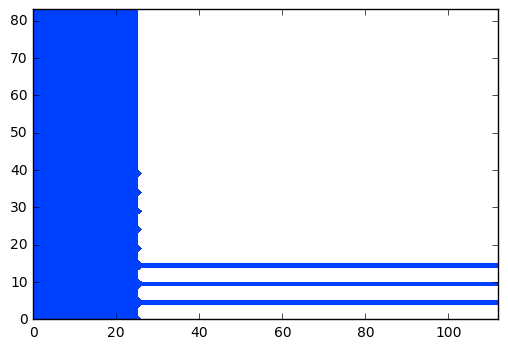

In [24]:
#Plot Contour form Data Frame As a Matrix

fig = plt.figure()
graph = fig.add_subplot(111)
graph.contourf(MLO_data)
#Not quite sure why it does not use the dates on the x axis or actual altitudes

In [26]:
MLO_data_masked_array.shape

(84, 113)

/apps/developers/compilers/canopy/1.7.4/1/bit-64/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log10
/apps/developers/compilers/canopy/1.7.4/1/bit-64/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10


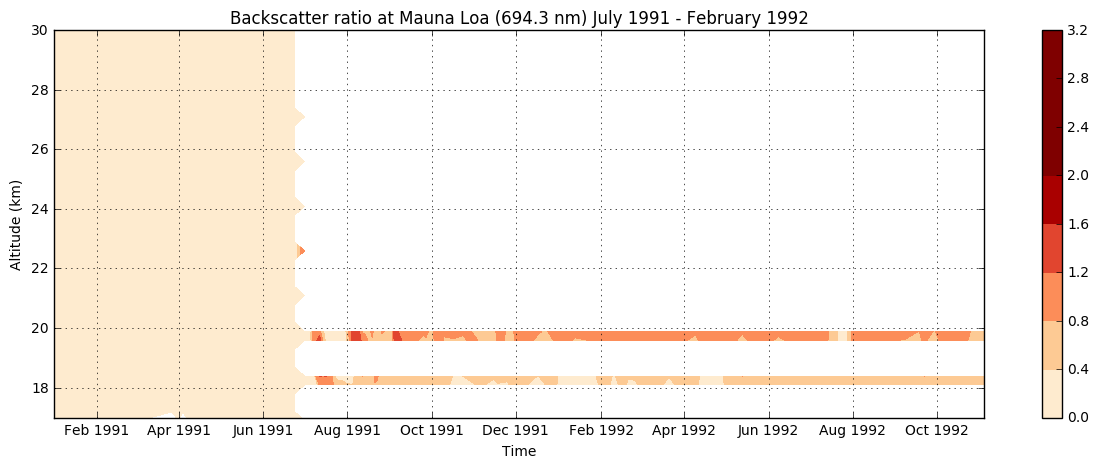

In [25]:
#Using column and Index Info
Dates=MLO_data.columns# This is in date time format so it is easy to deal with
#print Dates
Alts=map(float,pd.Index.tolist(MLO_data.index)) #Initially this is in a funny Index object so we need to change to a list of float values
#print Alts


# define the colormap
cmap = plt.cm.get_cmap('OrRd', 11)
# extract all colors from the map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (1.0,1.0,1.0,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#Set Color For Values less than plot Bounds
cmap.set_under('w')


MLO_data_masked_array=np.ma.masked_where(MLO_data<1, MLO_data) # Masking out data below a Threshold

#Make it Log-Scale to See FIne Details.
MLO_data_masked_array_Log=np.log10(MLO_data_masked_array)
#MLO_data_array_Log = np.log10(MLO_data)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
# pcolor "shows" where Python would try to interpolate - i.e. similar to Aspendale data.
#MLO=ax.pcolor(Dates,Alts,MLO_data_masked_array_Log)#8,cmap=cmap, vmin=0, vmax=2)
# contourf creates the initial contoured plot shown on posters.
# Contoured masked data
MLO=ax.contourf(Dates,Alts,MLO_data_masked_array_Log,8,cmap=cmap, vmin=0, vmax=2)
#MLO=ax.contourf(Dates,Alts,MLO_data_array_Log,8,cmap=cmap, vmin=0, vmax=2)
cbar = plt.colorbar(MLO) # Creates colour bar/scale
plt.title('Backscatter ratio at Mauna Loa (694.3 nm) July 1991 - February 1992')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid()
plt.ylim(17,30)
fig.savefig('/nfs/see-fs-01_users/gy11s2s/Python/Layers_over_time_analysis/Lidar/Jan1991-Nov1992.png', bbox_inches='tight')